# Trabalho Final de Machine Learning
## Etapa 3: Preparação dos Dados

**Projeto:** Modelagem de Previsão de Aprovação de Empréstimos

**Equipe:**
- Gabriel M. Zavarize
- Nicolas B. Pereira
- Nícolas M. Cardoso
- Pedro H. H. Marques
- Wilian V. Fernandes

1. Limpeza de dados
2. Tratamento de valores nulos
3. Identificação e tratamento de outliers
4. Codificação de variáveis categóricas
5. Normalização/Padronização de variáveis numéricas
6. criação de novas variáveis
7. Divisão dos dados em treino e teste


## 1. Importação de Bibliotecas

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder

## 2. Carregamento dos Dados
`loan_approval_dataset.csv`

In [2]:
df = pd.read_csv('loan_approval_dataset.csv')
print(f"Dimensões: {df.shape[0]} linhas x {df.shape[1]} colunas")

Dimensões: 4500 linhas x 13 colunas


### 2.2 Visão Geral dos Dados

In [3]:
display(df.head())
df.info()
display(df.describe())

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Not Graduate,No,900662.0,8573635,2,430.0,20306227.0,13484652,1165518,3451949,Rejected
1,2,5,Not Graduate,No,7756968.0,34210882,20,681.0,2041000.0,8763663,18585308,11147891,Approved
2,3,4,Graduate,No,863399.0,10485296,14,524.0,1452975.0,9102300,4293208,14212634,Rejected
3,4,3,Graduate,No,4904250.0,3014636,12,442.0,11243783.0,8523917,9380818,7631454,Approved
4,5,0,Graduate,No,5752451.0,11260895,4,730.0,25396173.0,15327462,15726541,11288430,Approved


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4500 non-null   int64  
 1   no_of_dependents          4500 non-null   int64  
 2   education                 4500 non-null   object 
 3   self_employed             4500 non-null   object 
 4   income_annum              4410 non-null   float64
 5   loan_amount               4500 non-null   int64  
 6   loan_term                 4500 non-null   int64  
 7   cibil_score               4455 non-null   float64
 8   residential_assets_value  4365 non-null   float64
 9   commercial_assets_value   4500 non-null   int64  
 10  luxury_assets_value       4500 non-null   int64  
 11  bank_asset_value          4500 non-null   int64  
 12  loan_status               4500 non-null   object 
dtypes: float64(3), int64(7), object(3)
memory usage: 457.2+ KB


,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4500.000000,4500.000000,4.410000e+03,4.500000e+03,4500.000000,4455.000000,4.365000e+03,4.500000e+03,4.500000e+03,4.500000e+03
mean,2250.500000,2.466222,5.077944e+06,1.993568e+07,11.116444,601.827834,1.446045e+07,9.728789e+06,1.231413e+07,7.500945e+06
std,1299.182435,1.700376,2.818194e+06,1.129079e+07,5.743556,174.074131,8.499060e+06,5.533613e+06,7.186944e+06,4.283044e+06
min,1.000000,0.000000,2.001840e+05,3.045540e+05,2.000000,300.000000,-9.603900e+04,4.844000e+03,9.614000e+03,6.902000e+03
25%,1125.750000,1.000000,2.631144e+06,1.008483e+07,6.000000,453.500000,7.045515e+06,4.991603e+06,6.210138e+06,3.760857e+06
50%,2250.500000,3.000000,5.080236e+06,2.012044e+07,10.000000,602.000000,1.454232e+07,9.761089e+06,1.217923e+07,7.412728e+06
75%,3375.250000,4.000000,7.555594e+06,2.962041e+07,16.000000,755.000000,2.170617e+07,1.436643e+07,1.858606e+07,1.116023e+07
max,4500.000000,5.000000,9.898640e+06,3.947613e+07,20.000000,900.000000,2.909976e+07,1.939396e+07,2.499788e+07,1.499543e+07


### 2.3 Identificação das Variáveis

In [4]:
# Separar variáveis por tipo
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

# Remover identificador das numéricas
if 'loan_id' in numerical_cols:
    numerical_cols.remove('loan_id')

# Remover target das categóricas
if 'loan_status' in categorical_cols:
    categorical_cols.remove('loan_status')

print(f"Variáveis Numéricas ({len(numerical_cols)}): {numerical_cols}")
print(f"\nVariáveis Categóricas ({len(categorical_cols)}): {categorical_cols}")
print(f"\nVariável Target: loan_status")

Variáveis Numéricas (9): ['no_of_dependents', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']

Variáveis Categóricas (2): ['education', 'self_employed']

Variável Target: loan_status


## 3. Análise de Valores Ausentes

VALORES AUSENTES


,Coluna,Valores Nulos,Percentual (%)
residential_assets_value,residential_assets_value,135,3.0
income_annum,income_annum,90,2.0
cibil_score,cibil_score,45,1.0


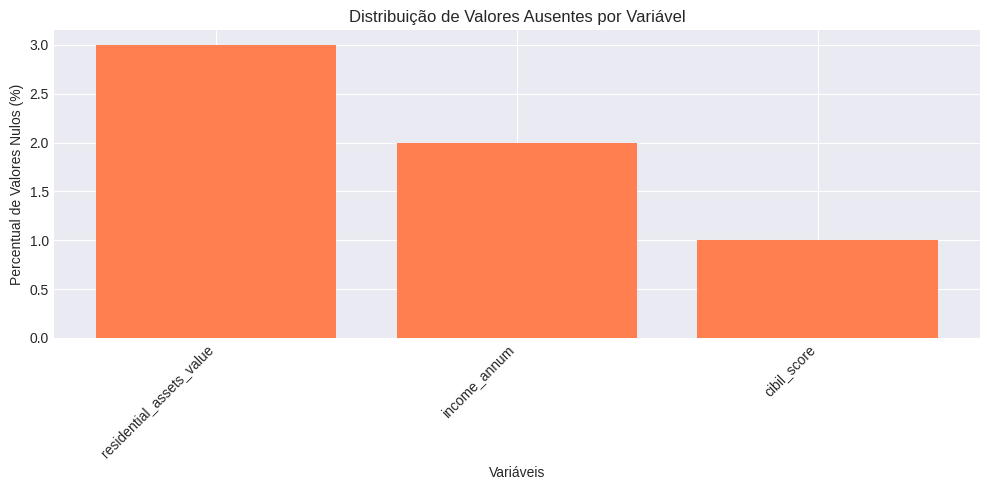

In [8]:
missing_data = pd.DataFrame({
    'Coluna': df.columns,
    'Valores Nulos': df.isnull().sum(),
    'Percentual (%)': (df.isnull().sum() / len(df)) * 100
})

missing_data = missing_data[missing_data['Valores Nulos'] > 0].sort_values('Valores Nulos', ascending=False)

if len(missing_data) > 0:
    print("VALORES AUSENTES")
    display(missing_data)
    plt.figure(figsize=(10, 5))
    plt.bar(missing_data['Coluna'], missing_data['Percentual (%)'], color='coral')
    plt.xlabel('Variáveis')
    plt.ylabel('Percentual de Valores Nulos (%)')
    plt.title('Distribuição de Valores Ausentes por Variável')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("Nenhum valor ausente detectado")

## 4. Tratamento de Valores Ausentes

- Variáveis numéricas: Imputação pela mediana
- Variáveis categóricas: Imputação pela moda

In [9]:
# Criar cópia para não alterar o original
df_clean = df.copy()

# Tratamento de valores nulos em variáveis numéricas
for col in numerical_cols:
    if df_clean[col].isnull().sum() > 0:
        median_value = df_clean[col].median()
        df_clean[col].fillna(median_value, inplace=True)
        print(f"✓ {col}: {df[col].isnull().sum()} valores nulos preenchidos com mediana = {median_value:.2f}")

# Tratamento de valores nulos em variáveis categóricas
for col in categorical_cols:
    if df_clean[col].isnull().sum() > 0:
        mode_value = df_clean[col].mode()[0]
        df_clean[col].fillna(mode_value, inplace=True)
        print(f"✓ {col}: {df[col].isnull().sum()} valores nulos preenchidos com moda = {mode_value}")

print(f"\nFINAL")
print(f"Total valores nulos restantes: {df_clean.isnull().sum().sum()}")

✓ income_annum: 90 valores nulos preenchidos com mediana = 5080235.50
✓ cibil_score: 45 valores nulos preenchidos com mediana = 602.00
✓ residential_assets_value: 135 valores nulos preenchidos com mediana = 14542324.00

FINAL
Total valores nulos restantes: 0


## 5. Identificação e Tratamento de Outliers

In [10]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    return len(outliers), lower_bound, upper_bound

print("ANÁLISE DE OUTLIERS")
outlier_summary = []

for col in numerical_cols:
    n_outliers, lower, upper = detect_outliers_iqr(df_clean, col)
    outlier_summary.append({
        'Variável': col,
        'Outliers': n_outliers,
        'Percentual (%)': (n_outliers / len(df_clean)) * 100,
        'Limite Inferior': lower,
        'Limite Superior': upper
    })

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df[outlier_df['Outliers'] > 0])

ANÁLISE DE OUTLIERS


,Variável,Outliers,Percentual (%),Limite Inferior,Limite Superior


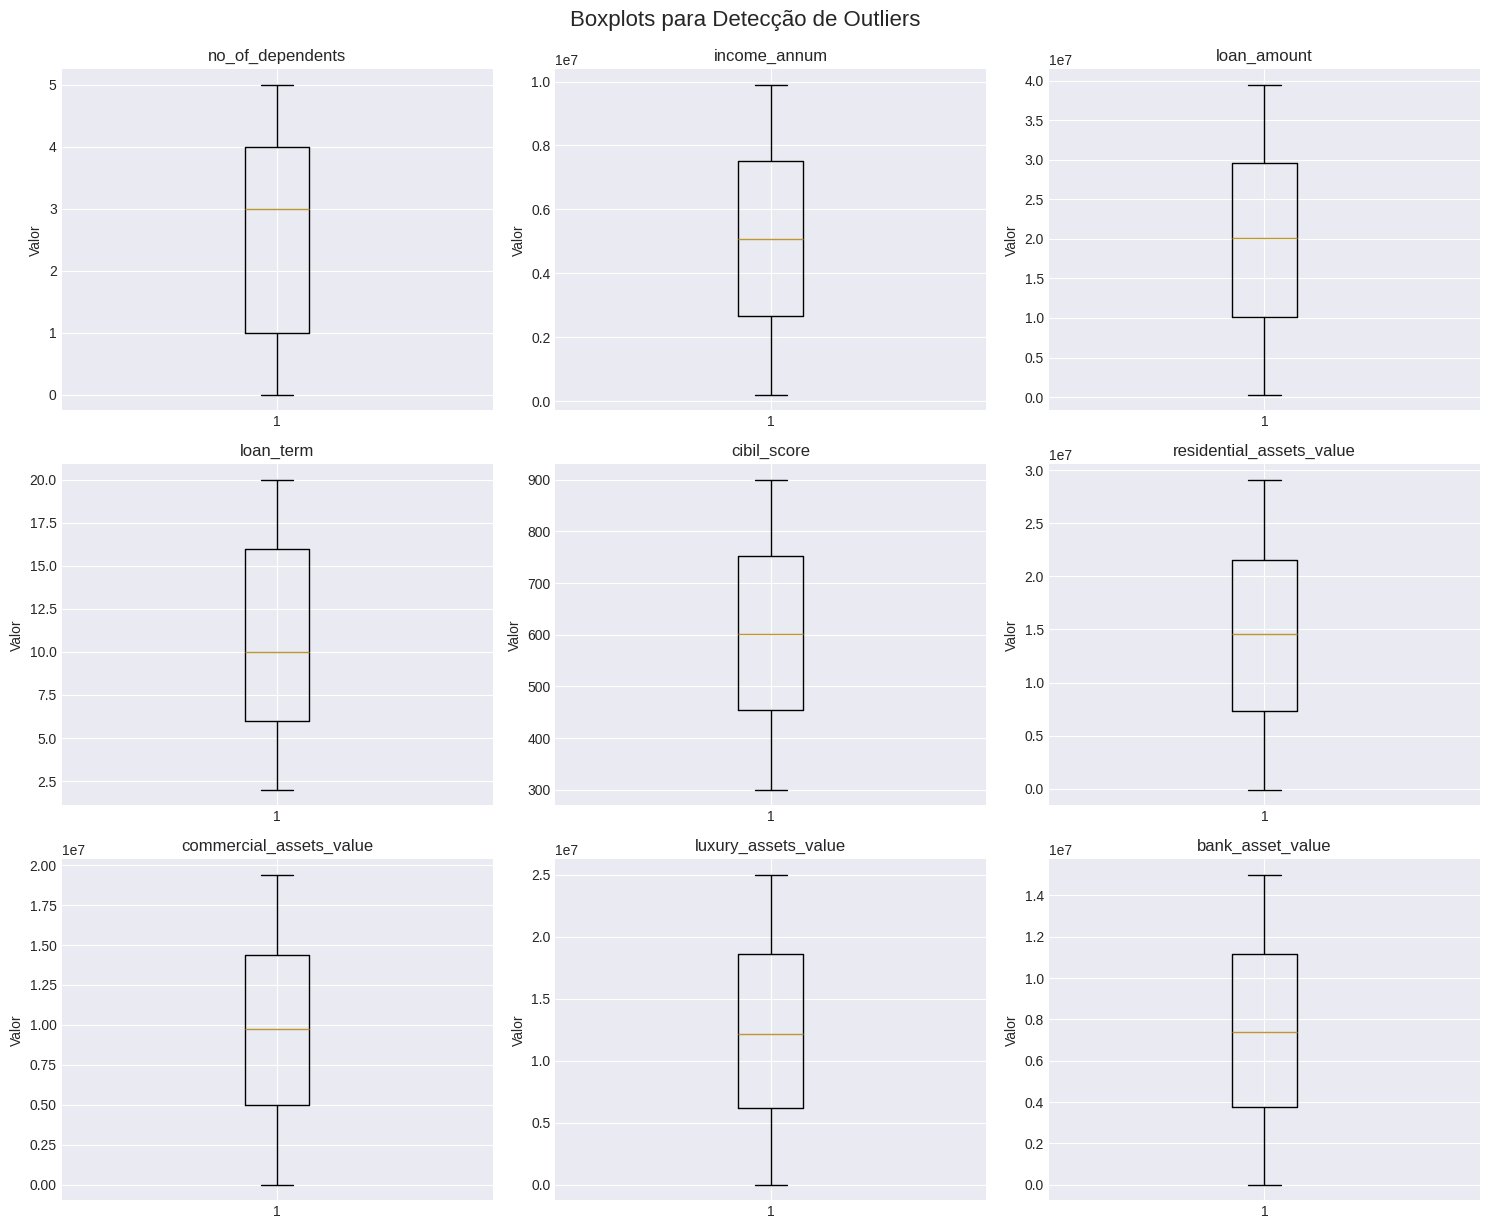

In [11]:
# Visualização de outliers
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols[:9]):
    axes[idx].boxplot(df_clean[col].dropna(), vert=True)
    axes[idx].set_title(f'{col}')
    axes[idx].set_ylabel('Valor')

plt.tight_layout()
plt.suptitle('Boxplots para Detecção de Outliers', y=1.02, fontsize=16)
plt.show()

### 5.1 Tratamento de Outliers

In [12]:
print("Outliers serão mantidos no dataset")
print("Valores extremos podem ser legítimos em contexto financeiro")

Outliers serão mantidos no dataset
Valores extremos podem ser legítimos em contexto financeiro


## 6. Criação de novas variáveis

### 6.1 Relação Crédito/Renda

In [14]:
# Feature 1: Relação Crédito/Renda
df_clean['credit_income_ratio'] = df_clean['loan_amount'] / df_clean['income_annum']

print("credit_income_ratio (Relação Crédito/Renda)")
print(f"  Média: {df_clean['credit_income_ratio'].mean():.2f}")
print(f"  Mediana: {df_clean['credit_income_ratio'].median():.2f}")
print(f"  Min: {df_clean['credit_income_ratio'].min():.2f} | Max: {df_clean['credit_income_ratio'].max():.2f}")

credit_income_ratio (Relação Crédito/Renda)
  Média: 8.03
  Mediana: 3.92
  Min: 0.03 | Max: 152.93


### 6.2 Outras Features Derivadas

In [15]:
# Feature 2: Total de Ativos
df_clean['total_assets'] = (df_clean['residential_assets_value'] +
                             df_clean['commercial_assets_value'] +
                             df_clean['luxury_assets_value'] +
                             df_clean['bank_asset_value'])

# Feature 3: Relação Ativos/Renda
df_clean['assets_income_ratio'] = df_clean['total_assets'] / df_clean['income_annum']

# Feature 4: Relação Empréstimo/Ativos Totais
df_clean['loan_assets_ratio'] = df_clean['loan_amount'] / (df_clean['total_assets'] + 1)  # +1 para evitar divisão por zero

# Feature 5: Indicador de Alto Endividamento
df_clean['high_debt'] = (df_clean['credit_income_ratio'] > 3).astype(int)

# Feature 6: Indicador de Baixo Score de Crédito
df_clean['low_cibil'] = (df_clean['cibil_score'] < 650).astype(int)

print("✓ Features adicionais criadas:")
print("  - total_assets: Soma de todos os ativos")
print("  - assets_income_ratio: Relação Ativos/Renda")
print("  - loan_assets_ratio: Relação Empréstimo/Ativos")
print("  - high_debt: Indicador binário de alto endividamento")
print("  - low_cibil: Indicador binário de baixo score de crédito")

✓ Features adicionais criadas:
  - total_assets: Soma de todos os ativos
  - assets_income_ratio: Relação Ativos/Renda
  - loan_assets_ratio: Relação Empréstimo/Ativos
  - high_debt: Indicador binário de alto endividamento
  - low_cibil: Indicador binário de baixo score de crédito


### 6.3 Atualizar Lista de Variáveis Numéricas

In [16]:
# Atualizar lista de variáveis numéricas com as novas features
new_features = ['credit_income_ratio', 'total_assets', 'assets_income_ratio',
                'loan_assets_ratio', 'high_debt', 'low_cibil']

numerical_cols_extended = numerical_cols + new_features

print(f"Total de variáveis numéricas: {len(numerical_cols_extended)}")
print(f"Novas features: {new_features}")

Total de variáveis numéricas: 15
Novas features: ['credit_income_ratio', 'total_assets', 'assets_income_ratio', 'loan_assets_ratio', 'high_debt', 'low_cibil']


## 7. Transformar variáveis categóricas em formato numérico

In [17]:
# Análise das variáveis categóricas
print("VARIÁVEIS CATEGÓRICAS")
for col in categorical_cols:
    print(f"\n{col}:")
    print(df_clean[col].value_counts())

VARIÁVEIS CATEGÓRICAS

education:
education
Graduate        2321
Not Graduate    2179
Name: count, dtype: int64

self_employed:
self_employed
No     3155
Yes    1345
Name: count, dtype: int64


### 7.1 Encoding para Variáveis Binárias

In [19]:
# Codificar variáveis binárias
# Graduate=1, Not Graduate=0
df_clean['education_encoded'] = df_clean['education'].map({'Graduate': 1, 'Not Graduate': 0})

# self_employed: Yes=1, No=0
df_clean['self_employed_encoded'] = df_clean['self_employed'].map({'Yes': 1, 'No': 0})

# loan_status (TARGET): Approved=1, Rejected=0
df_clean['loan_status_encoded'] = df_clean['loan_status'].map({'Approved': 1, 'Rejected': 0})

print("Variáveis categóricas codificadas:")
print("  - education → education_encoded")
print("  - self_employed → self_employed_encoded")
print("  - loan_status → loan_status_encoded (TARGET)")

Variáveis categóricas codificadas:
  - education → education_encoded
  - self_employed → self_employed_encoded
  - loan_status → loan_status_encoded (TARGET)


## 8. Divisão dos Dados (Train/Test)

Proporção: 80% treino / 20% teste

In [20]:
# Preparar features (X) e target (y)
# Remover colunas não utilizadas
cols_to_drop = ['loan_id', 'education', 'self_employed', 'loan_status']
X = df_clean.drop(columns=cols_to_drop + ['loan_status_encoded'])
y = df_clean['loan_status_encoded']

# Divisão estratificada (mantém proporção das classes)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(" DIVISÃO DOS DADOS ")
print(f"Conjunto de Treino: {X_train.shape[0]} amostras ({X_train.shape[0]/len(df_clean)*100:.1f}%)")
print(f"Conjunto de Teste:  {X_test.shape[0]} amostras ({X_test.shape[0]/len(df_clean)*100:.1f}%)")
print(f"\nDistribuição da variável target (treino):")
print(y_train.value_counts(normalize=True))
print(f"\nDistribuição da variável target (teste):")
print(y_test.value_counts(normalize=True))

 DIVISÃO DOS DADOS 
Conjunto de Treino: 3600 amostras (80.0%)
Conjunto de Teste:  900 amostras (20.0%)

Distribuição da variável target (treino):
loan_status_encoded
1    0.66
0    0.34
Name: proportion, dtype: float64

Distribuição da variável target (teste):
loan_status_encoded
1    0.66
0    0.34
Name: proportion, dtype: float64


## 9. Normalização de Variáveis Numéricas
padronização para média=0, desvio=1

In [22]:
# Excluir variáveis já binárias (0/1)
cols_to_scale = [col for col in X_train.columns if col not in ['education_encoded', 'self_employed_encoded', 'high_debt', 'low_cibil']]

# Criar e ajustar o scaler APENAS no treino
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

# Fit no treino, transform em ambos
X_train_scaled[cols_to_scale] = scaler.fit_transform(X_train[cols_to_scale])
X_test_scaled[cols_to_scale] = scaler.transform(X_test[cols_to_scale])

print("Normalização aplicada com StandardScaler")
print(f"  Colunas normalizadas: {len(cols_to_scale)}")
print(f"\nExemplo de transformação (primeira variável):")
print(f"  Antes - Média: {X_train[cols_to_scale[0]].mean():.2f}, Desvio: {X_train[cols_to_scale[0]].std():.2f}")
print(f"  Depois - Média: {X_train_scaled[cols_to_scale[0]].mean():.2f}, Desvio: {X_train_scaled[cols_to_scale[0]].std():.2f}")

Normalização aplicada com StandardScaler
  Colunas normalizadas: 13

Exemplo de transformação (primeira variável):
  Antes - Média: 2.47, Desvio: 1.70
  Depois - Média: 0.00, Desvio: 1.00


## 10. Salvamento dos Dados Processados

Salvar os dados preparados para uso nas próximas etapas

In [23]:
# Salvar dados processados
X_train_scaled.to_csv('X_train_scaled.csv', index=False)
X_test_scaled.to_csv('X_test_scaled.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

# Salvar também versões não normalizadas
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)

# Salvar o scaler para uso futuro
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

print("\nArquivos gerados:")
print("  - X_train.csv / X_test.csv (dados não normalizados)")
print("  - X_train_scaled.csv / X_test_scaled.csv (dados normalizados)")
print("  - y_train.csv / y_test.csv (variável target)")
print("  - scaler.pkl (objeto StandardScaler)")


Arquivos gerados:
  - X_train.csv / X_test.csv (dados não normalizados)
  - X_train_scaled.csv / X_test_scaled.csv (dados normalizados)
  - y_train.csv / y_test.csv (variável target)
  - scaler.pkl (objeto StandardScaler)


In [25]:
# Verificação final
print(" PREPARAÇÃO DE DADOS CONCLUÍDA")
print(f"\nShape final dos dados:")
print(f"  X_train: {X_train_scaled.shape}")
print(f"  X_test: {X_test_scaled.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  y_test: {y_test.shape}")
print(f"\nTotal de features: {X_train_scaled.shape[1]}")

 PREPARAÇÃO DE DADOS CONCLUÍDA

Shape final dos dados:
  X_train: (3600, 17)
  X_test: (900, 17)
  y_train: (3600,)
  y_test: (900,)

Total de features: 17
